# Trabalho 3: Avaliando sistemas de IR

Neste trabalho, o aluno irá explorar o problema de otimização de sistemas de IR através da análise de métricas de avaliação populares para esse tipo de sistema.

Para isso, vamos usar a base CFC (com artigos sobre fibrose cística), a qual encontra-se nesta pasta.

Observação: a idéia aqui é usar o jupyter para mostrar a evolução dos teus experimentos. Então use ele adequadamente. Ou seja, não altere funções do começo para reexecutar algo que foi feito lá embaixo. Neste caso, sobreescreva a função lá embaixo. A leitura do notebook tem que ser feita sequencialmente para ficar fácil, ok?


## Passo 1 - Normalização

Primeira coisa que você vai precisar fazer é ler os arquivos do CFC. Essa é uma parte meio braçal mesmo, mas não tem como escapar dela. Então você terá que criar funções que consigam ler cada arquivo do CFC e parsear eles.


## Fazendo a leitura e parse dos documentos

In [1]:
import pandas as pd
import json

#Vetores dos documentos da base
FILES = ['cfc/cf74', 'cfc/cf75', 'cfc/cf76', 'cfc/cf77', 'cfc/cf78', 'cfc/cf79']

#Campos a serem lidos dos documentos
col = ['PN', 'RN', 'AN', 'AU', 'TI', 'SO', 'MJ', 'MN', 'AB/EX', 'RF', 'CT']

#Matriz total dos documentos
matrixTotal = []

#Função de inserção dos valores contidos em cada campo do 
#documento, e posteriormente adicionadas na matriz total
def insert(i, value, vector):
    if(len(vector) <= i):
        vector.insert(i,value)
    else:
        vector[i] += ' ' + value

#Para cada campo respectivo, o seu valor será salvo na matriz (função de parse)
def constructVector(vector, line, cod):  
    if(cod == 'PN'): # Número do papel
        insert(0, line[3:], vector)
        
    elif(cod == 'RN'): # Número de registro
        insert(1, line[3:], vector)
        
    elif(cod == 'AN'): #  Número de acesso MEDLINE
        insert(2, line[3:], vector)
        
    elif(cod == 'AU'): # Autor (ou Autores)
        insert(3, line[3:], vector)

    elif(cod == 'TI'): # Título
        insert(4, line[3:], vector)
        
    elif(cod == 'SO'): # Fonte
        insert(5, line[3:], vector)
        
    elif(cod == 'MJ'): # Assuntos Principais
        insert(6, line[3:], vector)
    
    elif(cod == 'MN'): # Assuntos Menores
        insert(7, line[3:], vector)
        
    elif((cod == 'AB') or (cod == 'EX')): # Resumo / Extração (do texto)
        insert(8, line[3:], vector)
        
    elif(cod == 'RF'): # Referências
        insert(9, line[3:], vector)
        
    elif(cod == 'CT'): # Citações
        insert(10, line[3:], vector)
    else:
        pass
    
#Função que faz a leitura de cada arquivo e salva em uma matriz
def fileToMatrix(file):
    matrix = []
    with open(file, 'r', encoding = 'iso-8859-1') as fp:
        vector = []
        line = fp.readline()
        cod = line[:2]
        constructVector(vector, line.strip().replace("  ", ""), cod)

        while line:
            line = fp.readline()
            if not((line[:2]).isspace()):
                cod = line[:2]
            if((line == "\n") and (len(vector) > 2)):
                matrix.append(vector)
                vector = []
            constructVector(vector, line.strip().replace("  ", ""), cod)    
    
    fp.close()
    return matrix

#Passagem dos arquivos para a matriz
for file in FILES:
    matrixTotal.extend(fileToMatrix(file))  
    
#Exibição da matrix completa com todos os seus campos
pd.DataFrame(matrixTotal, columns=col)  

,PN,RN,AN,AU,TI,SO,MJ,MN,AB/EX,RF,CT
0,74001,00001,75051687,Hoiby-N.Jacobsen-L.Jorgensen-B-A.Lykkegaard-E....,Pseudomonas aeruginosa infection in cystic fib...,Acta-Paediatr-Scand. 1974 Nov. 63(6). P 843-8.,CYSTIC-FIBROSIS: co.PSEUDOMONAS-AERUGINOSA: im...,ADOLESCENCE.BLOOD-PROTEINS: me.CHILD.CHILD-PRE...,The significance of Pseudomonas aeruginosa inf...,001 BELFRAGE SACTA MED SCAND SUPPL 173 5 963 ...,1 HOIBY N SCAND J RESPIR DIS5638 975 OIBY N AC...
1,74002,00002,74260154,Rossiter-M-A.Barrowman-J-A.Dand-A.Wharton-B-A.,Amylase content of mixed saliva in children.,Acta-Paediatr-Scand. 1974 May. 63(3). P 389-92.,SALIVA: en.AMYLASES: me.NUTRITION-DISORDERS: e...,INFANT.CHILD-PRESCHOOL.CHILD.ADOLESCENCE.HUMAN...,Salivary amylase levels were determined in nor...,001 ANDERSEN DH J PEDIATR 30 564 947 BARBEZAT...,1 ALHADEFF JA CLIN GENET1063 976 ASZLO AACTA P...
2,74003,00003,74252221,Kollberg-H.Ekbohm-G.,A clinical study of the diagnosis of cystic fi...,Acta-Paediatr-Scand. 1974 May. 63(3). P 411-7.,CYSTIC-FIBROSIS: di.NAILS: an.SODIUM: an.,INFANT-NEWBORN.INFANT.CHILD-PRESCHOOL.CHILD.AD...,This article reports on the possibility of usi...,001 BOWEN HJM ADV ACTIVATION ANALYS1 101 969 ...,1 KOLLBERG HSCAND J CLIN LAB INVEST 3517 975 A...
3,74004,00004,74252220,Kollberg-H.Landstrom-O.,A methodological study of the diagnosis of cys...,Acta-Paediatr-Scand. 1974 May. 63(3). P 405-10.,CYSTIC-FIBROSIS: di.NAILS: an.SODIUM: an.,CHILD-PRESCHOOL.HUMAN.CYSTIC-FIBROSIS: me.ACTI...,Instrumental neutron activation analysis (INAA...,001 ANDERSEN GH TRANS AM NUCL SOC 1057 967 AN...,1 HELLSING KSCAND J CLIN LAB INVEST 33 333 974...
4,74005,00005,75051680,Lindberg-T.,Proteolytic activity in duodenal juice in infa...,Acta-Paediatr-Scand. 1974 Nov. 63(6). P 805-8.,DUODENUM: en.INTESTINAL-SECRETIONS: en.PEPTIDE...,ADULT.AGE-FACTORS.CASEINS: me.CELIAC-DISEASE: ...,The capacity of duodenal juice to hydrolyse ca...,001 BERGSTROM K SCAND J GASTROENTEROL5 533 970...,1 BROCK JHIMMUNOLOGY32 207 977 CHMITZ J GASTRO...
5,74006,00006,75014083,Hoiby-N.Mathiesen-L.,Pseudomonas aeruginosa infection in cystic fib...,Acta-Pathol-Microbiol-Scand [B]. 1974 Aug. 82(...,B-LYMPHOCYTES: im.CYSTIC-FIBROSIS: im.IMMUNITY...,ADOLESCENCE.ANTIBODIES-BACTERIAL.ANTIGENS-BACT...,The influence of chronic Ps. aeruginosa infect...,001 AIUTI F INFECT IMMUN 8 110 973 AIUTI F CL...,1 HOIBY N ACTA PATH MICROBIOL SCAND (B) 82 551...
6,74007,00007,75014084,Hoiby-N.,Pseudomonas aeruginosa infection in cystic fib...,Acta-Pathol-Microbiol-Scand [B]. 1974 Aug. 82(...,CYSTIC-FIBROSIS: im.IMMUNITY.PSEUDOMONAS-AERUG...,ANTIBODIES-BACTERIAL.ANTIGENS-BACTERIAL.CYSTIC...,The occurrence of Pseudomonas aeruginosa in th...,001 BURNS MWLANCET 1 270 968 BURNS MWBR MED J...,1 HOIBY N ACTA PATH MICROBIOL SCAND (B) 82 541...
7,74008,00008,75009735,Hoiby-N.,Epidemiological investigations of the respirat...,Acta-Pathol-Microbiol-Scand [B]. 1974 Aug. 82(...,CYSTIC-FIBROSIS: mi.BACTERIA: ip.BACTERIA: ip....,ADOLESCENCE.CHILD.CHILD-PRESCHOOL.CYSTIC-FIBRO...,Seventy patients with cystic fibrosis treated ...,001 BURNS MWLANCET 1 270 968 COWAN STMANUAL F...,1 HOIBY N ACTA PATH MICROBIOL SCAND (B) 82 559...
8,74009,00009,74087894,Franklin-J-L.Asquith-P.Rosenberg-I-H.,The occurrence of cystic fibrosis and celiac s...,Am-J-Dig-Dis. 1974 Feb. 19(2). P 149-55.,CYSTIC-FIBROSIS: fg.CELIAC-DISEASE: fg.,"ADULT.BIOPSY.CELIAC-DISEASE: co, fg.CHILD. TIC...",A family is presented in which celiac sprue an...,001 HIDE DW ARCH DIS CHILD44 533 969 ANTONOWI...,1 SAFWENBERG JTISSUE ANTIGENS 10 287 977
9,74010,00010,74154352,Burnell-R-H.Robertson-E-F.,Cystic fibrosis in a patient with Kartagener s...,Am-J-Dis-Child. 1974 May. 127(5). P 746-7.,CYSTIC-FIBROSIS: co.KARTAGENER-TRIAD: co.,CASE-REPORT.CHLORIDES: an.HUMAN.INFANT.LUNG: r...,A patient exhibited the features of both Karta...,001 KARTAGENER MBEITR KLIN TUBERK 83 489 933 ...,1 BOCHKOVA DN GENETIKA (SOVIET GENETICS)11 154...


## Fazendo a leitura e parse das Queries

In [2]:
from operator import itemgetter
import numpy as np

#Arquivo de queries
cfquery = 'cfc/cfquery'

#Matriz das Queries
queryFile = []

#Peso atribuido, repectivamente, referente aos avaliadores: REW, REW colleagues, REW post-doctorates e JBW
weight = [1, 1, 1, 1] 

#Função de atribuição dos pesos para cada documento de gabarito 
def scoreCalc(weigth, v):
    values = [int(digit) for digit in v]
    weighted_avg = np.average(values, weights=weight)
    return weighted_avg

#Função de inserção do conteúdo em um vetor
def insertQ(i, value, vector):
    if(len(vector) <= i):
        vector.insert(i,value)
    else:
        if(type(value) is list):
            vector[i].extend(value)
            vector[i].sort(key=itemgetter(1), reverse=True)
        elif(len(value)== 5):
            vector[i] = value
        elif(type(value) is str):
            vector[i] += value

#Função de parse do documento de queries
def constructQueryVector(vector, line, cod):  
    if(cod == 'QN'):
        aux = list(line)
        k = ''
        k = str(k)
        for i in range(len(aux)):
            k = (str(k) + str(aux[i]))
        insertQ(0, k, vector)
        
    elif(cod == 'QU'):
        insertQ(1, line, vector)
        
    elif(cod == 'NR'):
        insertQ(2, str(int(line)), vector)
        
    elif(cod == 'RD'):
        v = line.split(' ')
        v1 = []
        ve = []
        for i, result in enumerate(v):
            if not(result):
                continue          
            v1.append(result)
            if(len(v1) == 2):
                v1[0] = int(v1[0])
                score = scoreCalc(weight, v1[1])
                v1[1] = score
                ve.append(v1)
                v1 = []
        
        insertQ(3, ve, vector)
    else:
        pass

#Função de leitura e construção da matriz de queries
def queryMatrix(file):
    matrix = []
    with open(file, 'r', encoding = 'iso-8859-1') as fp:
        vector = []
        line = fp.readline()
        cod = line[:2]
        constructQueryVector(vector, line[3:].strip(), cod)
        
        while line:
            line = fp.readline()
            
            if not((line[:2]).isspace()):
                cod = line[:2]
                line = line[3:]
        
            if(line.isspace()):
                matrix.append(vector)
                vector = []
            constructQueryVector(vector, line.strip(), cod)    
    
    fp.close()
    return matrix

#Construção da matriz de queries
queryFile.extend(queryMatrix(cfquery))

#Legenda de cada coluna
col= ['Number','Query','Relevants', 'Documents']

#Exibição dos 10 primeiros valores da matriz
pd.DataFrame(queryFile[0:10], columns=col)    


,Number,Query,Relevants,Documents
0,00001,What are the effects of calcium on the physica...,34,"[[533, 2.0], [139, 1.75], [441, 1.75], [151, 1..."
1,00002,Can one distinguish between the effects of muc...,7,"[[169, 0.25], [434, 0.5], [454, 0.25], [498, 0..."
2,00003,How are salivary glycoproteins from CF patient...,43,"[[633, 2.0], [139, 1.75], [375, 1.75], [856, 1..."
3,00004,What is the lipid composition of CF respirator...,9,"[[604, 2.0], [876, 2.0], [711, 1.75], [669, 0...."
4,00005,Is CF mucus abnormal?,131,"[[151, 2.0], [374, 2.0], [439, 2.0], [593, 2.0..."
5,00006,What is the effect of water or other therapeut...,24,"[[31, 2.0], [503, 1.25], [875, 1.0], [370, 0.5..."
6,00007,Are mucus glycoproteins degraded differently i...,28,"[[371, 1.75], [623, 1.5], [856, 1.25], [1064, ..."
7,00008,What histochemical differences have been descr...,22,"[[23, 1.5], [499, 1.5], [683, 1.5], [1125, 1.5..."
8,00009,What is the association between liver disease ...,10,"[[414, 2.0], [165, 1.5], [794, 1.0], [1115, 0...."
9,00010,What is the role of Vitamin E in the therapy o...,25,"[[157, 2.0], [413, 2.0], [581, 2.0], [676, 1.7..."


## Passo 2 - Primeira indexação

Depois de parsear os arquivos, agora é hora de indexar os dados. Ao invés de criar o código do zero, vamos usar o Whoosh, que é uma implementação em python inspirada no Lucene. A documentação pode ser encontrada em https://whoosh.readthedocs.io/en/latest/index.html.

Nesta questão de indexação, temos que fazer algumas escolhas: 
* Como fazer o processo de tokenização? 
* Stemmizar ou não stemmizar, eis a questão...
* Quais campos são úteis para indexação?

Neste momento, você vai tomar suas decisões iniciais. A ideia é você testar, depois, outras soluções para verificar quais tiveram os melhores resultados, entendeu? Então não esqueça de documentar, aqui, qual a sua decisão inicial e depois ir explicando ao longo do notebook os experimentos que está fazendo.

In [3]:
from whoosh.fields import Schema, TEXT, KEYWORD, ID, STORED,NUMERIC
from whoosh import index
import os, shutil

#Função de criação de um diretório de index
def createIndexDir(name, schema):
    if os.path.exists(name):
        shutil.rmtree(name)
    os.mkdir(name)
    ix = index.create_in(name, schema)
    return ix


#Definição do nosso schema, com o que foi tido como relevante para ser tratado no sistema
#Os campos considerados relevantes foram: Número de papel e registro para manter um controle dos documentos 
#selecionados; Título, Assuntos Principais e Menores e Resumo/Extração para realizar as pesquisas e IR
schema = Schema(pn=NUMERIC(stored=True), #PN = paper_number (Número do papel)
                rn=NUMERIC(stored=True), #RN = record_number (Número de registro)
                ti=TEXT(stored=True), #TI = title (Título)
                mj=TEXT(stored=True), #MJ = major_subjects (Assuntos Principais)
                mn=TEXT(stored=True), #MN = minor_subjects (Assuntos Menores)
                ab=TEXT(stored=True), #AB/EX = abstract or extract (Resumo/Extração)
                )

#Função de escrita para adicionar documentos no index
def writeInIndex(indexName, schema):
    ix = createIndexDir(indexName, schema)
    ix = index.open_dir(indexName) #Abrindo um objeto de index já existente
    writer = ix.writer() # Cria um objeto de escrita para adicionar documentos ao index

    for doc in matrixTotal:
        writer.add_document(pn=doc[0], #Adiciona documentos ao index
                            rn=doc[1],
                            ti=doc[4],
                            mj=doc[6],
                            mn=doc[7],
                            ab=doc[8]
                           )
    writer.commit()
    print(indexName + " criado com sucesso!")

    
    
#Criando o index
writeInIndex("index", schema)

index criado com sucesso!


## Passo 3 - Calculando as métricas de avaliação

Para avaliar a tua decisão, vamos usar como métricas a precisão, recall e f-measure. Faça uma variação da precisão e recall como P@n e R@n, pois serão úteis para os gráficos que serão gerados. 

### 3.1 - Fazendo as queries

## Normalização das queries para a utilização do Whoosh

In [4]:
import spacy
from spacy.lang.pt.stop_words import STOP_WORDS
from nltk.stem.snowball import SnowballStemmer

#Definindo a linguagem de normalização
stemmer = SnowballStemmer('english')
nlp = spacy.load('en')

#Função de normalização
def norma(text):
    text = nlp(text.lower())
    termos = [token for token in text if not (token.is_stop or token.pos_ == 'PUNCT' or token.pos_ == 'PRON' or token.pos_ == 'CCONJ' or token.pos_ == 'DET')]
    texto = ''
    for term in termos:
        texto += ' ' + stemmer.stem(term.orth_) 
    return texto


### Criando as nossas queries

In [5]:
from whoosh.qparser import *
from whoosh import scoring

queryTest = [] 

#Fazendo parse das queries de acordo com o nosso schema
def makeQuery(query, schemaName):
    og = OrGroup.factory(0.9)
    parser = MultifieldParser(["ti", "ab", "mj", "mn"], schema=schemaName, group=og) 
    result=parser.parse(query)   
    return result
    
#Rodando as nossas queries na base de dados
def storeQueryResult(queryTest, schemaName):    
    ix = index.open_dir("index") 
    for result in queryFile: 
        v = []
        v.append(result[0]) #Número da query (pergunta)
        query = result[1] #Query
        
        with ix.searcher() as searcher:
            result = makeQuery(query, schemaName)
            results=searcher.search(result, limit=None)
            #Os objetos de resultados funcionam como uma lista dos documentos correspondentes
            v.append(len(results)) 
            docs = []
            for doc in results:
                docs.append(int(doc.get('rn')))
            v.append(docs)
        
        queryTest.append(v)
    return queryTest

#Alimentando a matriz com os resultados das queries
queryTest = storeQueryResult(queryTest, schema)

#Legenda de cada coluna
col= ['Query','Retrived','Documents']

#Exibindo os 10 primeiros resultados da matriz
pd.DataFrame(queryTest[0:10], columns = col) 


,Query,Retrived,Documents
0,00001,481,"[533, 302, 484, 139, 52, 950, 856, 1185, 741, ..."
1,00002,619,"[761, 592, 754, 1082, 614, 498, 452, 980, 1223..."
2,00003,900,"[633, 856, 1206, 959, 128, 218, 805, 500, 1171..."
3,00004,465,"[725, 1039, 715, 876, 604, 148, 928, 768, 25, ..."
4,00005,389,"[151, 499, 975, 754, 498, 265, 592, 481, 1064,..."
5,00006,648,"[31, 47, 976, 805, 496, 592, 593, 1104, 441, 6..."
6,00007,956,"[1064, 754, 856, 498, 265, 151, 975, 499, 633,..."
7,00008,784,"[439, 1145, 768, 269, 1030, 25, 956, 453, 743,..."
8,00009,621,"[165, 549, 545, 339, 720, 581, 870, 99, 863, 1..."
9,00010,770,"[1218, 581, 165, 438, 414, 878, 326, 676, 963,..."


### 3.2 - Análise

In [10]:
totalDocuments = set()

for query in queryFile:
    for doc in query[3]:
        totalDocuments.add(doc[0])

#Função que lista quais dos documentos retornados pela sistema são relevantes 
def getRelevant(line, n=None):
    relevant = set()
    for i,doc in enumerate(line[3]):
        relevant.add(doc[0])
        if((n != None) and (i+1 == n)):
            return relevant
    return relevant

#Função que lista quais documentos foram retornados pela sistema
def getRetrived(line, n=None):
    retrived = set()
    for i,doc in enumerate(line[2]):
        retrived.add(doc)
        if((n != None) and (i+1 == n)):
            return retrived
    return retrived
     
    
#Funções de cálculo de Falso Positivo, Falso Negativo, Verdadeiro Positivo e Verdadeiro Negativo
def getTruePositive(relevant, retrived):
    return relevant & retrived

def getFalsePositive(relevant, retrived):
    return retrived - getTruePositive(relevant, retrived)

def getTrueNegative(relevant, retrived):
    return totalDocuments - (relevant | retrived)

def getFalseNegative(relevant, retrived):
    return relevant - getTruePositive(relevant, retrived)


#Funções que retornam o valor de Precisão, Recall e F-Measure
def getPrecision(relevant, retrived):
    tp = getTruePositive(relevant, retrived)
    tp_fp = len(retrived) # len(tp) + len(fp)
    if(tp_fp == 0):
        return 0
    return len(tp)/tp_fp

def getRecall(relevant, retrived): 
    tp = getTruePositive(relevant, retrived)
    tp_fn = len(relevant) # len(tp) + len(fn)
    if(tp_fn == 0):
        return 0
    return len(tp)/tp_fn

def getFMeasure(precision, recall):
    p_r = precision + recall
    if(p_r == 0):
        return 0
    return (2 * precision * recall)/p_r


#Matriz com os resultados 
analysisMatrix = []

#Função que retorna a matriz de análise dos resultados (precisão, recall e f-measure)
def analysis(queryFile, queryTest):
    for i, query in enumerate(queryFile):
        qn = []
        qn.append(int(query[0]))
        
        relevant = getRelevant(query)
        qn.append(len(relevant))
 
        retrived = getRetrived(queryTest[i])
        qn.append(len(retrived))
        retrivedUntil5 = getRetrived(queryTest[i], 5)
        retrivedUntil10 = getRetrived(queryTest[i], 10)

        precision = getPrecision(relevant, retrived)
        precisionUntil5 = getPrecision(relevant, retrivedUntil5)
        precisionUntil10 = getPrecision(relevant, retrivedUntil10)
        qn.append(precision)
        qn.append(precisionUntil5)
        qn.append(precisionUntil10)
        
        recall = getRecall(relevant, retrived)
        recallUntil5 = getRecall(relevant, retrivedUntil5)
        recallUntil10 = getRecall(relevant, retrivedUntil10)
        qn.append(recall)
        qn.append(recallUntil5)
        qn.append(recallUntil10)
        
        fMeasure = getFMeasure(precision, recall)
        qn.append(fMeasure)
        
        analysisMatrix.append(qn)

#Alimentando a matriz de análise   
analysis(queryFile, queryTest)

#Legenda de cada coluna
col = ['Query','Relevant', 'Retrived', 'Precision', 'P@5','P@10','Recall','R@5','R@10', 'F-Measure']

#Primeiros 10 resultados da matriz de análise
pd.DataFrame(analysisMatrix[0:10], columns=col)

,Query,Relevant,Retrived,Precision,P@5,P@10,Recall,R@5,R@10,F-Measure
0,1,34,481,0.051975,0.4,0.3,0.735294,0.058824,0.088235,0.097087
1,2,7,619,0.008078,0.2,0.2,0.714286,0.142857,0.285714,0.015974
2,3,43,900,0.043333,0.4,0.3,0.906977,0.046512,0.069767,0.082715
3,4,9,465,0.017204,0.4,0.2,0.888889,0.222222,0.222222,0.033755
4,5,131,389,0.169666,0.8,0.8,0.503817,0.030534,0.061069,0.253846
5,6,24,648,0.035494,0.4,0.5,0.958333,0.083333,0.208333,0.068452
6,7,28,956,0.025105,0.4,0.3,0.857143,0.071429,0.107143,0.048780
7,8,22,784,0.022959,0.2,0.2,0.818182,0.045455,0.090909,0.044665
8,9,10,621,0.014493,0.2,0.1,0.900000,0.100000,0.100000,0.028526
9,10,25,770,0.029870,0.4,0.4,0.920000,0.080000,0.160000,0.057862


# Passo 4 - Gráficos do experimento 1

Apresentar agora os gráficos do teu experimento. Você deve gerar um gráfico PxR, como visto em sala. Para gerar gráficos, você pode usar o matplotlib. Se quiser usar outra biblioteca que ache mais fácil, sem problemas!

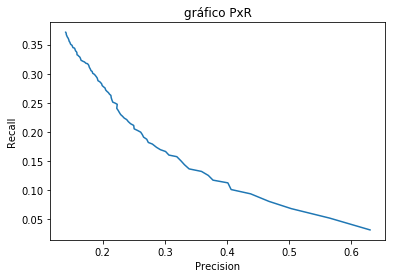

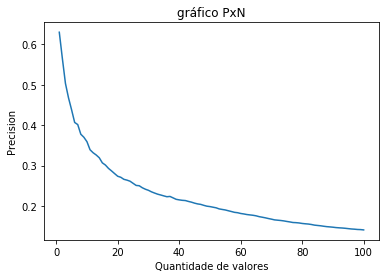

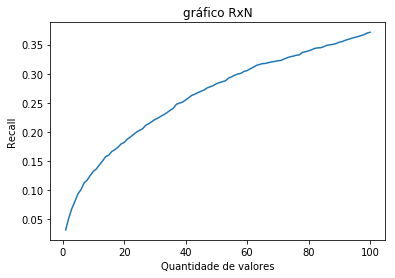

In [12]:
import matplotlib.pyplot as plt

#Função para plotar o gráfico de Precisão, Recall e PxR
def plotGraph(queryFile,queryTest):
    R = [] 
    P = []
    tam = len(analysisMatrix)
    for i in range(tam):
        n = i+1
        somaP = 0
        somaR = 0
        for j, query in enumerate(queryFile):
            relevant = getRelevant(query)
            retrivedN = getRetrived(queryTest[j], n) 
            somaP += getPrecision(relevant, retrivedN) #P@n
            somaR += getRecall(relevant, retrivedN) #R@n
        P.append((somaP/tam))
        R.append((somaR/tam))

    plt.title("gráfico PxR")
    plt.plot(P,R)
    plt.xlabel("Precision")
    plt.ylabel("Recall")
    plt.show()

    plt.title("gráfico PxN")
    plt.plot(range(1,tam +1), P)
    plt.xlabel("Quantidade de valores")
    plt.ylabel("Precision")
    plt.show()

    plt.title("gráfico RxN")
    plt.plot(range(1,tam +1),R)
    plt.xlabel("Quantidade de valores")
    plt.ylabel("Recall")
    plt.show()

    
    
plotGraph(queryFile,queryTest)


## Passo 5 - Demais experimentos

Agora você irá testar novas configurações de campos e configurações para tentar encontrar qual a que te dá melhores resultados. Mostrar, como um relatório, a evolução do trabalho. Ou seja, mostrar como o trabalho foi evoluindo para você alcançar o melhor resultado (quais modificações foram feitas, como cada modificação influenciou nas métricas, etc).

In [8]:
from whoosh.analysis import StemmingAnalyzer
from nltk.corpus import stopwords

sw = stopwords.words("english")
ana =  StemmingAnalyzer(stoplist=sw)

schema2 = Schema(pn=ID(stored=True), #paper_number
                rn=NUMERIC(stored=True), #record_number
                ti=TEXT(analyzer=ana,stored=True), #title
                mj=KEYWORD(stored=True, scorable=True), #major_subjects
                mn=KEYWORD(stored=True, scorable=True), #minor_subjects
                ab=TEXT(analyzer=ana,stored=True), #abstract or extract
                )
    

writeInIndex("index2", schema2) #creating second index
print("Segundo Index criado!")

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  Searched in:
    - '/home/mattheus/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - '/home/mattheus/anaconda3/nltk_data'
    - '/home/mattheus/anaconda3/share/nltk_data'
    - '/home/mattheus/anaconda3/lib/nltk_data'
**********************************************************************


In [ ]:
queryTest2 = []
queryTest2 = storeQueryResult(queryTest2, schema)

analysis(queryFile, queryTest2)
col = ['Query','Relevant', 'Retrived', 'Precision', 'P@5','P@10','Recall','R@5','P@10', 'F-Measure']
pd.DataFrame(analysisMatrix[0:10], columns=col)

## Passo 6 - Quantos resultados eu devo voltar para o usuário?

Um dos problemas de sistemas de IR é determinar quantos resultados você deve retornar ao usuário. Uma forma de entender o comportamento do sistema e qual o corte ideal na lista resultante é através do uso de curvas ROC. Assim, plote a curva ROC do teu sistema e determine, através da análise da curva, qual o ponto ideal de corte para o teu sistema.

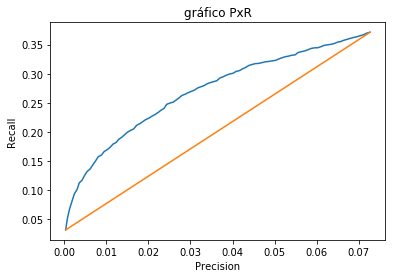

In [41]:
def getTotalPositives(relevant, retrived):
    return len(getTruePositive(relevant, retrived)) + len(getFalseNegative(relevant, retrived))

def getTotalNegatives(relevant, retrived):
    return len(getTrueNegative(relevant, retrived)) + len(getFalsePositive(relevant, retrived))



def getTPRate(relevant, retrived):
    return len(getTruePositive(relevant, retrived)) / getTotalPositives(relevant, retrived)

def getFPRate(relevant, retrived):
    return len(getFalsePositive(relevant, retrived)) / getTotalNegatives(relevant, retrived)


def plotROC_Graph(queryFile,queryTest):
    X = []
    Y = []
    tam = len(analysisMatrix)
    
    for i in range(tam):
        n = i+1
        tpMedia = 0
        fpMedia = 0

        for j, query in enumerate(queryFile):
            relevant = getRelevant(query)
            retrivedN = getRetrived(queryTest[j], n)
            tpMedia += getTPRate(relevant, retrivedN)
            fpMedia += getFPRate(relevant, retrivedN)
        X.append((tpMedia/tam))
        Y.append((fpMedia/tam))
        
    plt.title("Curva ROC")
    plt.plot(Y,X)
    plt.plot([Y[0],Y[tam-1]],[X[0],X[tam-1]])

    plt.show()

        
        
plotROC_Graph(queryFile,queryTest)